# 第一部分 预测某工业生产数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
dta=[10930,10318,10595,10972,7706,6756,9092,10551,9722,10913,11151,8186,6422, 
6337,11649,11652,10310,12043,7937,6476,9662,9570,9981,9331,9449,6773,6304,9355, 
10477,10148,10395,11261,8713,7299,10424,10795,11069,11602,11427,9095,7707,10767, 
12136,12812,12006,12528,10329,7818,11719,11683,12603,11495,13670,11337,10232, 
13261,13230,15535,16837,19598,14823,11622,19391,18177,19994,14723,15694,13248, 
9543,12872,13101,15053,12619,13749,10228,9725,14729,12518,14564,15085,14722, 
11999,9390,13481,14795,15845,15271,14686,11054,10395]

In [3]:
#此处将数据备份一份，随后会将数据修改，需要保留一份源数据
dta0=pd.Series(dta[:],index=sm.tsa.datetools.dates_from_range('2001','2090'))

In [4]:
#即数据长度
len(dta)

90

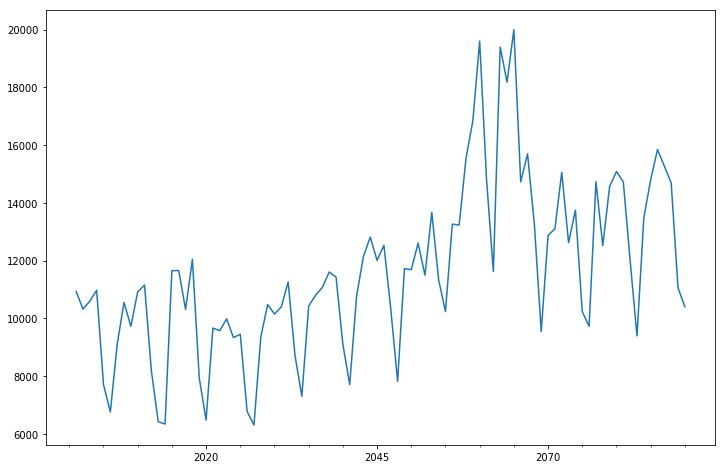

In [5]:
#使用pandas.Series容器封装数据，相比List，Series添加了时间索引，更适用于时间序列预测
dta=pd.Series(dta) 
#为数据添加时间索引
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('2001','2090'))
#绘图，观察数据趋势
dta.plot(figsize=(12,8))

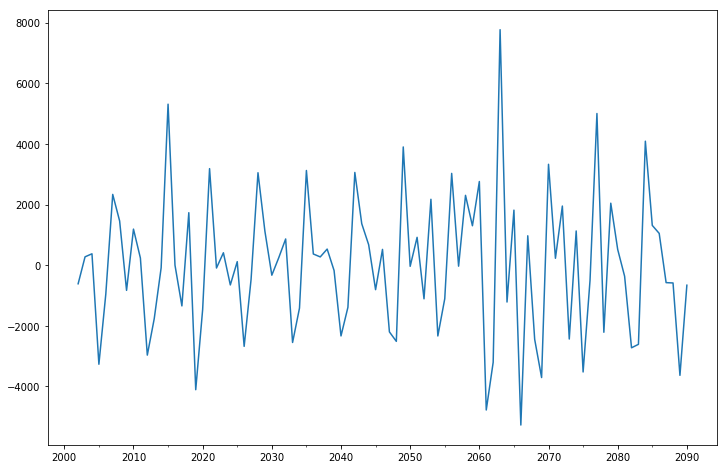

In [6]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
#对原始数据做一阶差分，观察数据
diff1 = dta.diff(1)
diff1.plot(ax=ax1)

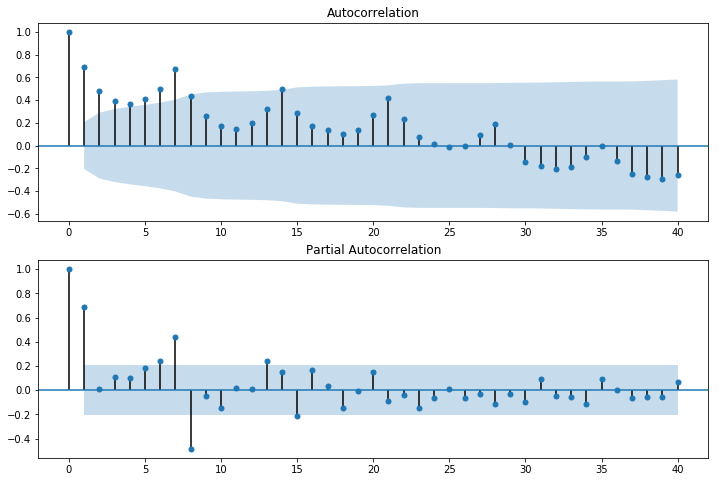

In [7]:
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
# 绘制ACF图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# 绘制PACF图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

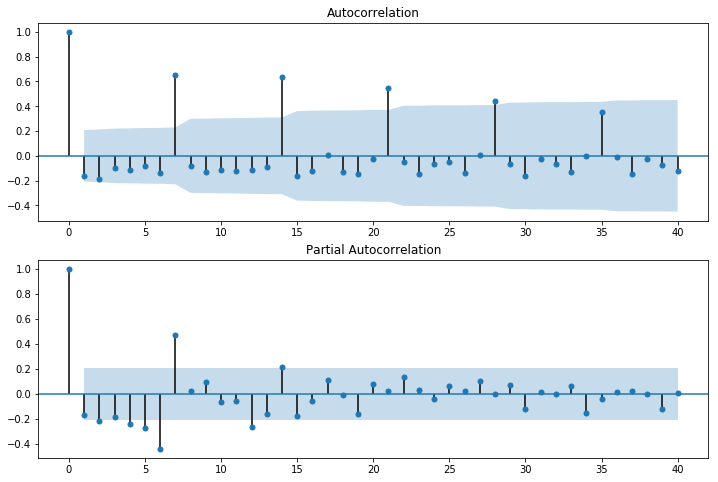

In [8]:
# 一阶差分
dta= dta.diff(1)[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
# 绘制ACF图
fig = sm.graphics.tsa.plot_acf(dta,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
# 绘制PACF图
fig = sm.graphics.tsa.plot_pacf(dta,lags=40,ax=ax2)

In [9]:
# 使用ARMA(p,q)模型进行拟合，并观察拟合效果
# AIC，BIC,HQIC都是衡量拟合效果的指标，越小越好
# 随q和p的增大，计算量会急剧增加，因此pq不会取得太大，通常最大取10
arma_mod70 = sm.tsa.ARMA(dta,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
# arma_mod150 = sm.tsa.ARMA(dta,(15,0)).fit()
# print(arma_mod150.aic,arma_mod150.bic,arma_mod150.hqic)
# arma_mod160 = sm.tsa.ARMA(dta,(16,0)).fit()
# print(arma_mod160.aic,arma_mod160.bic,arma_mod160.hqic)

1579.7025548172169 1602.1002821448062 1588.7304359492741
1632.3203732818517 1639.7862823910482 1635.3296669925376
1581.0916055325984 1605.9779692299198 1591.1225845682177
1581.3957835812896 1606.282147278611 1591.426762616909


In [10]:
# p=7，q=0，模型拟合结果较好，提取其残差进行后续处理
resid = arma_mod70.resid

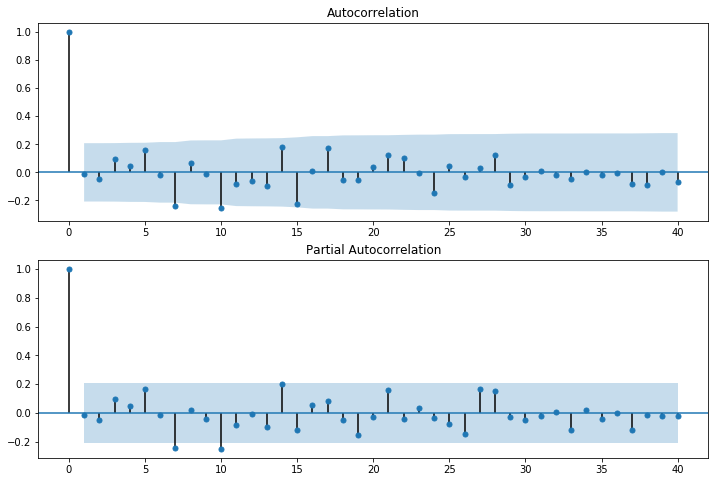

In [11]:
# 观察残差的ACF和PACF，判断ARMA模型是否完全涵盖了模型的自相关性
# 如果完全包含，则残差不应该自相关
# 如果观察到残差自相关，说明ARMA模型的阶数有问题，或者ARMA模型本身有问题
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()
# 此处残差已经基本完全随机，说明ARMA模型效果良好

In [12]:
# 残差D-W检验，结果越接近2，说明模型越准确，上下界分别为0和4
print(sm.stats.durbin_watson(arma_mod80.resid.values))

1.9893782789161099


In [13]:
print(sm.stats.durbin_watson(arma_mod70.resid.values))

2.024242428011464


NormaltestResult(statistic=5.9927147373093215, pvalue=0.04996875501152854)


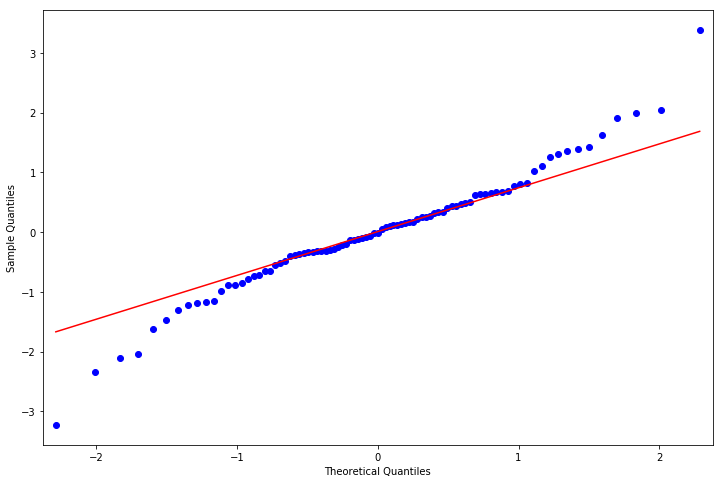

In [14]:
#输出 残差数据服从正态分布 出错误的统计学概率，即pvalue，越小越好
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
#绘制QQ图，观察残差数据与正态随机数据的分布区别，直观判断残差是否服从正态分布
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()

r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

2090-12-31   -1235.088632
2091-12-31    3468.783114
2092-12-31    1361.960465
2093-12-31     643.728563
2094-12-31    -560.185649
2095-12-31    -657.547774
2096-12-31   -2321.533720
2097-12-31    -784.976113
2098-12-31    2718.631281
2099-12-31    1171.043534
2100-12-31     280.629840
Freq: A-DEC, dtype: float64


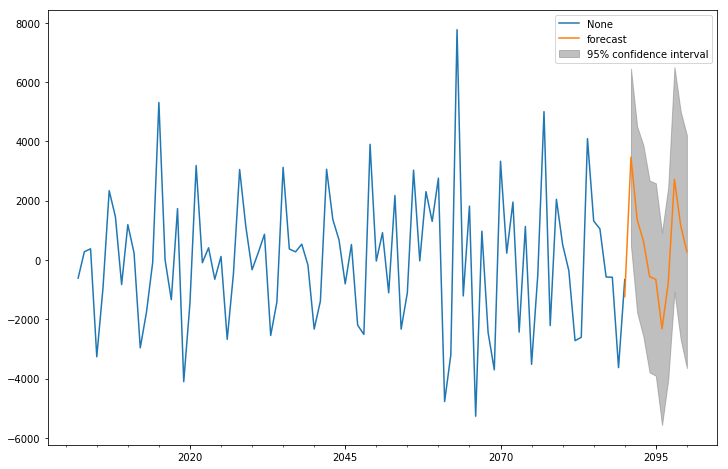

In [15]:
# 由ARMA(8,0)模型，以index = '2090'为初值，预测后续数据
predict_dta = arma_mod80.predict('2090', '2100', dynamic=True)
print(predict_dta)


fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['2000':].plot(ax=ax)
# 绘制预测结果
fig = arma_mod80.plot_predict('2090', '2100', dynamic=True, ax=ax, plot_insample=False)
plt.show()

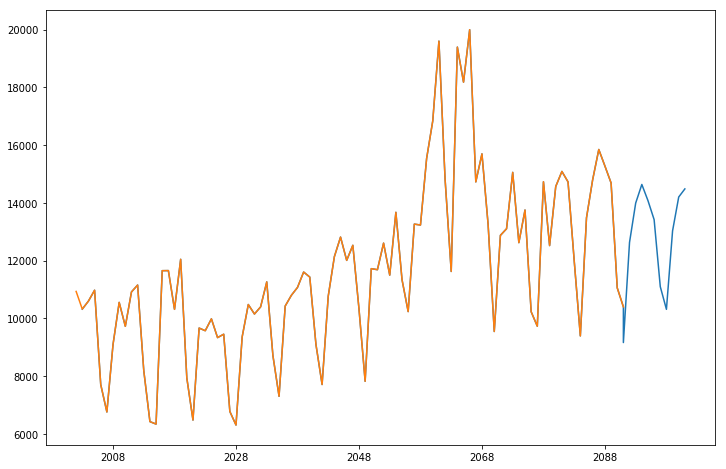

In [16]:
plt.subplots(figsize=(12, 8))
# 由一阶差分数据还原原数据并绘图
data = pd.concat([dta,predict_dta])
plt.plot(data.cumsum()+10930)
# 绘制原始数据与预测数据进行比对
plt.plot(dta0)
plt.show()

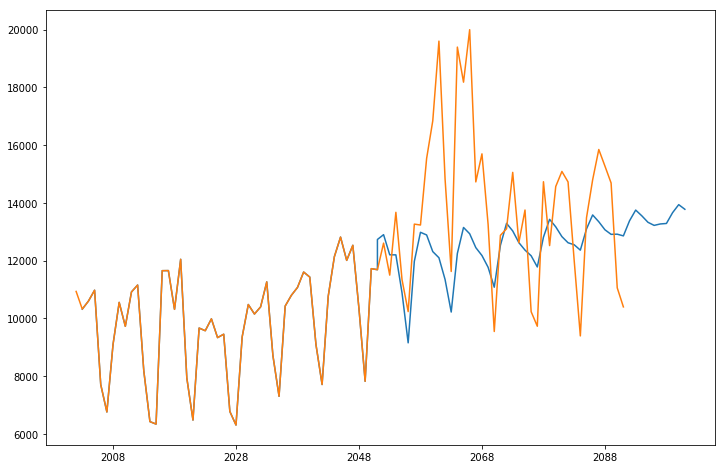

In [17]:
# 修改预测时间起点，对比预测结果与真实结果
predict_dta = arma_mod80.predict('2050', '2100', dynamic=True)
data = pd.concat([dta[:'2050'],predict_dta])
plt.subplots(figsize=(12, 8))
plt.plot(data.cumsum()+10930)
plt.plot(dta0)
plt.show()

# 第二部分 预测某股票走势

In [18]:
# 通过jaqs_fxdayu获取股票数据

start = 20160101
end = 20161001

import jaqs_fxdayu
from jaqs_fxdayu.data import DataView
from jaqs.data import RemoteDataService
from jaqs_fxdayu.data.dataservice import LocalDataService
import os
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

dataview_folder = 'G:/data'
dv = DataView()
ds = LocalDataService(fp=dataview_folder)


factor = []
check_factor = ','.join(factor)

dv_props = {'start_date': start, 'end_date': end, 'universe':'000001.SH',
         'fields': check_factor,
         'freq': 1,
         "prepare_fields": True}

dv.init_from_config(dv_props, data_api=ds)
dv.prepare_data()

Initialize config success.
Query data...
Query data - query...
NOTE: price adjust method is [post adjust]
当前请求daily...
{'adjust_mode': None, 'fields': 'vwap_adj,trade_date,low,high_adj,vwap,symbol,high,open,close,open_adj,close_adj,low_adj,trade_status'}
当前请求daily...
{'adjust_mode': 'post', 'fields': 'low,vwap,high,open,close,symbol,trade_date'}
    At fields 600005.SH, 601313.SH
Query data - daily fields prepared.
    At fields 600005.SH
Query data - quarterly fields prepared.
Query instrument info...
Query adj_factor...
Query benchmark...
Query benchmar member info...
Data has been successfully prepared.


In [19]:
#检验数据是否成功获取
dv.get_ts('close').tail()

symbol,600000.SH,600004.SH,600005.SH,600006.SH,600007.SH,600008.SH,600009.SH,600010.SH,600011.SH,600012.SH,...,603969.SH,603979.SH,603986.SH,603988.SH,603989.SH,603993.SH,603996.SH,603997.SH,603998.SH,603999.SH
trade_date,,,,,,,,,,,,,,,,,,,,,
20160926,16.48,13.86,NaN,7.56,21.47,4.21,26.98,2.75,7.07,12.19,...,14.15,18.13,177.97,58.54,33.55,3.70,22.72,18.43,15.74,32.15
20160927,16.48,13.91,NaN,7.59,21.86,4.24,27.17,2.77,7.09,12.26,...,14.17,18.23,177.97,59.21,33.68,3.69,22.84,18.84,15.82,32.99
20160928,16.48,13.70,NaN,7.55,21.94,4.19,26.94,2.75,7.08,12.30,...,14.08,18.16,177.97,58.68,34.19,3.71,22.50,18.64,16.13,32.38
20160929,16.50,13.78,NaN,7.57,21.90,4.18,26.98,2.79,7.08,12.13,...,13.98,18.19,177.97,58.48,34.52,3.71,22.45,18.69,16.16,32.22
20160930,16.49,13.82,NaN,7.59,22.13,4.19,26.97,2.78,7.04,12.19,...,13.86,18.18,177.97,57.69,34.92,3.71,22.92,18.60,16.29,32.87


In [20]:
#导入datetime库，为后续修改时间索引做准备
from datetime import datetime

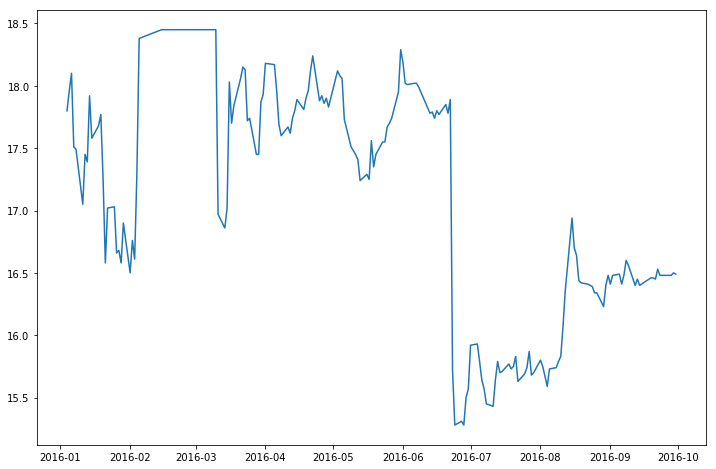

In [21]:
# 读取600000.SH的收盘价，进行后续预测
dta1 = dv.get_ts('close').loc[:,'600000.SH']
# 修改时间序列，使之能被sm识别
dta1.index = pd.Index(map(lambda x: datetime.strptime(str(x),"%Y%m%d") , dta1.index))
# 绘图观察数据趋势
plt.figure(figsize=(12,8))
plt.plot(dta1)
plt.show()

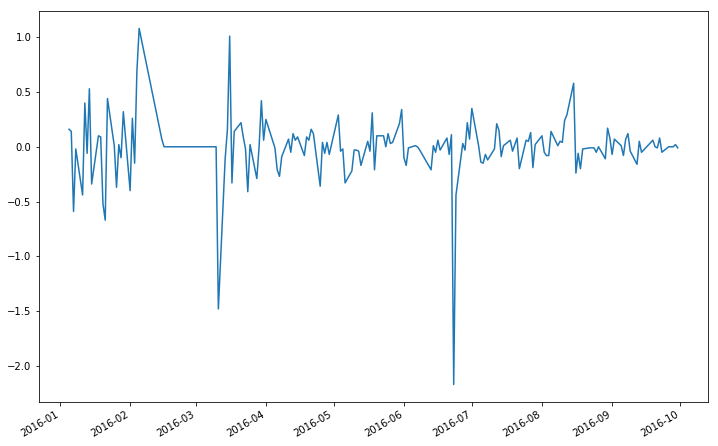

In [22]:
# 对数据一阶差分，观察数据趋势
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dta1.diff(1)
diff1.plot(ax=ax1)

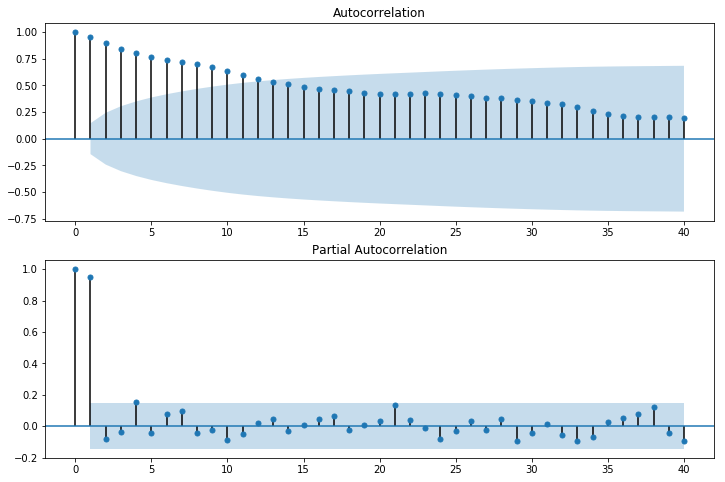

In [23]:
# 观察原始数据的ACF和PACF
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta1,lags=40,ax=ax2)

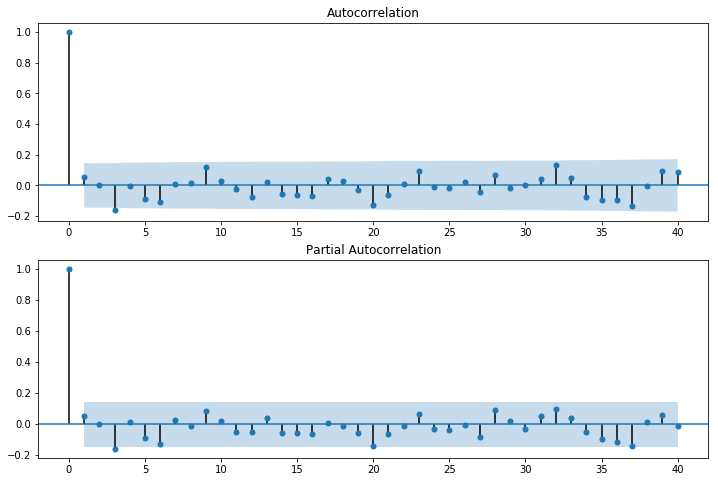

In [24]:
# 观察一阶差分数据的ACF和PACF
diff1= dta1.diff(1)[1:]
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)

In [25]:
# 计算各阶ARMA的AIC BIC HQIC值
arma_mod70 = sm.tsa.ARMA(dta1,(7,0)).fit()
print(arma_mod70.aic,arma_mod70.bic,arma_mod70.hqic)
arma_mod30 = sm.tsa.ARMA(dta1,(3,0)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod71 = sm.tsa.ARMA(dta1,(7,1)).fit()
print(arma_mod71.aic,arma_mod71.bic,arma_mod71.hqic)
arma_mod80 = sm.tsa.ARMA(dta1,(8,0)).fit()
print(arma_mod80.aic,arma_mod80.bic,arma_mod80.hqic)
arma_mod10 = sm.tsa.ARMA(dta1,(1,0)).fit()
print(arma_mod10.aic,arma_mod10.bic,arma_mod10.hqic)
arma_mod11 = sm.tsa.ARMA(dta1,(1,1)).fit()
print(arma_mod11.aic,arma_mod11.bic,arma_mod11.hqic)
arma_mod01 = sm.tsa.ARMA(dta1,(0,1)).fit()
print(arma_mod01.aic,arma_mod01.bic,arma_mod01.hqic)

73.3475729775476 102.28199479602847 85.0750548304522
72.15827312025885 88.23295190830379 78.67354081631697
74.84238314915689 106.99174072524674 87.87291854127312
75.0288151475566 107.17817272364645 88.05935053967283
69.52048268845147 79.16528996127842 73.42964330608633
70.43314397207592 83.29288700251186 75.64535812892241
330.43215737889534 340.0769646517223 334.3413179965302


In [26]:
resid = arma_mod10.resid

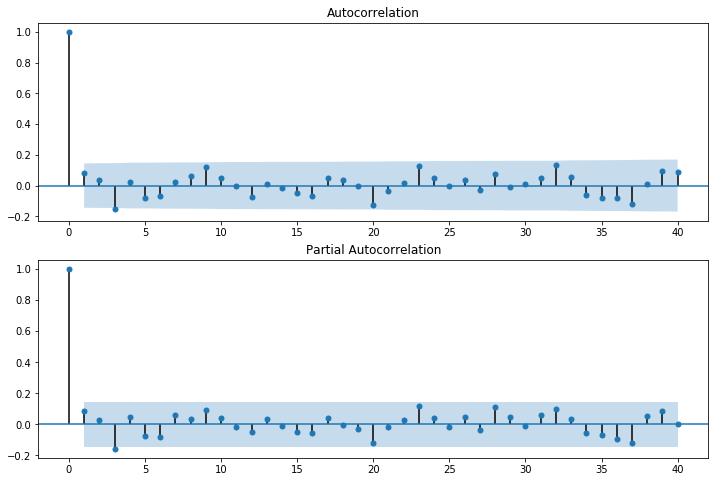

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2)
plt.show()

In [28]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))

1.8017479318804372


NormaltestResult(statistic=129.8626280855824, pvalue=6.319585711524224e-29)


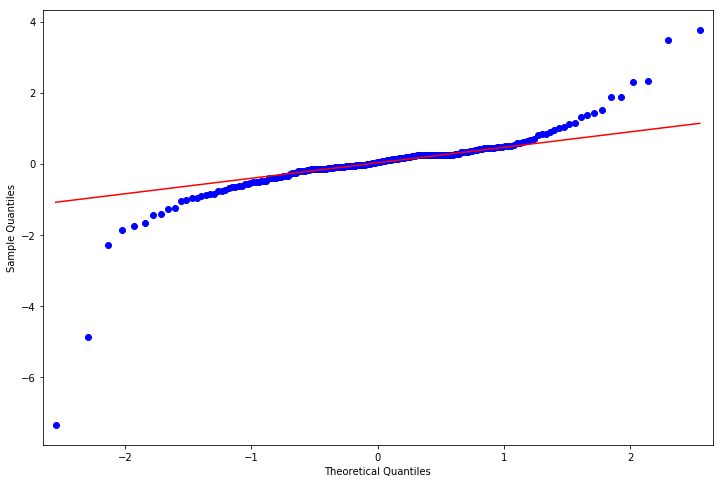

In [29]:
print(stats.normaltest(resid))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
#plt.show()

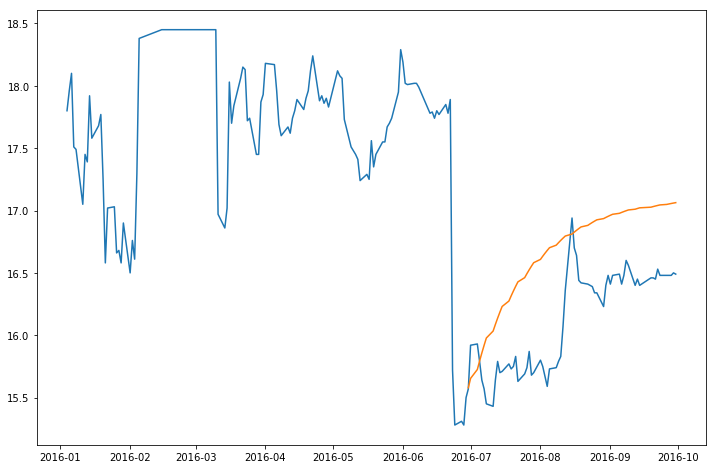

In [30]:
# 分别选取不同预测起点进行预测
# 2016m6即2016年6月最后一天
predict_dta = arma_mod10.predict('2016m6','2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()

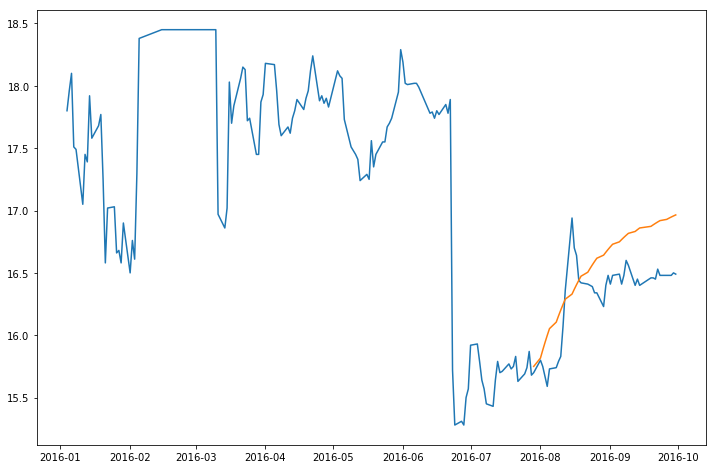

In [31]:
# 此处提供了表示时间的另一种方式
predict_dta = arma_mod10.predict(datetime.strptime('20160729',"%Y%m%d"),'2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()

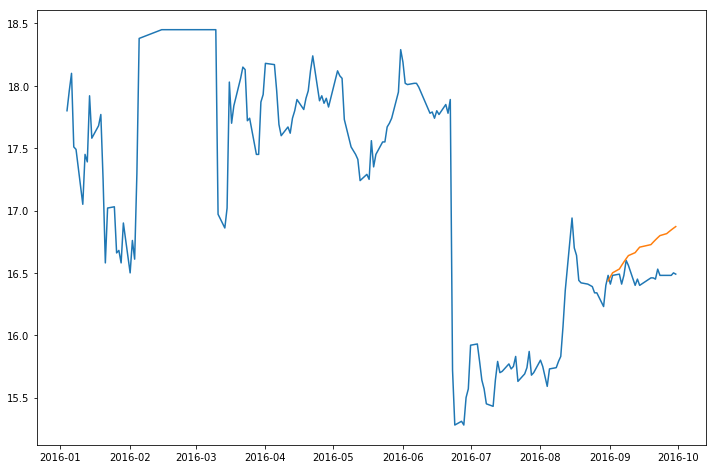

In [32]:
predict_dta = arma_mod10.predict('2016m8','2016m9', dynamic=True)
plt.subplots(figsize=(12, 8))
plt.plot(dta1)
plt.plot(predict_dta)
plt.show()